In [1]:
%matplotlib inline
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn import metrics

import itertools
import cv2
import pandas as pd
import numpy as np
import os
import seaborn as sns

In [2]:

labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                #resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([img_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [3]:
train = get_training_data('C:/Users/Administrateur/OneDrive/Formation DATASCIENCE/Projet DATA SCIENCE/chest_xray/train')
test = get_training_data('C:/Users/Administrateur/OneDrive/Formation DATASCIENCE/Projet DATA SCIENCE/chest_xray/test')
val = get_training_data('C:/Users/Administrateur/OneDrive/Formation DATASCIENCE/Projet DATA SCIENCE/chest_xray/val')

<ipython-input-2-0352b341fd9f>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

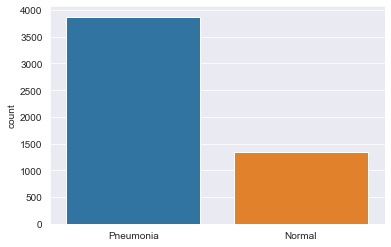

In [4]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)    

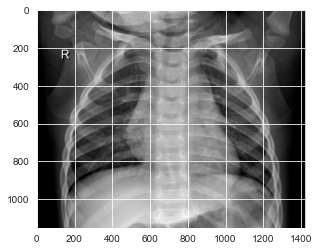

In [5]:
plt.imshow(train[3876][0],cmap='gray')

In [6]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

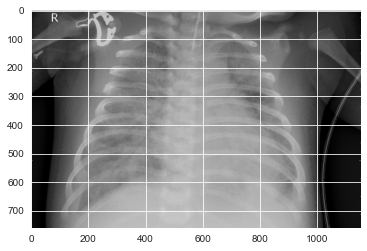

In [34]:
plt.imshow(x_train[0],cmap='gray')

In [8]:
x_train = np.array(x_train) 
x_val = np.array(x_val) 
x_test = np.array(x_test) 

<ipython-input-8-6b7918ad09d3>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train = np.array(x_train)
<ipython-input-8-6b7918ad09d3>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_val = np.array(x_val)
<ipython-input-8-6b7918ad09d3>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test = np.array(x_test)


In [10]:
x_train = x_train/255
x_val = x_val/255
x_test = x_test/255

MemoryError: Unable to allocate 24.8 MiB for an array with shape (1551, 2094) and data type float64

In [13]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

ValueError: cannot reshape array of size 5216 into shape (26,26,1)

In [48]:

X_train[10].shape

(1581, 1724)

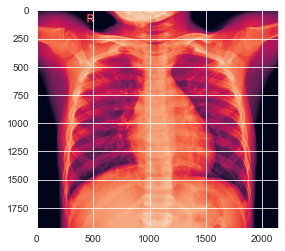

In [52]:
plt.imshow(X_train[14])

In [ ]:
# To import Keras's mnist datasets
from keras.datasets.mnist import load_data

# Loading MNIST data
#(X_train, y_train), (X_test, y_test) = load_data()

# Change the shape of X_train and X_test


#X_train = pd.DataFrame(X_train)
#X_test = pd.DataFrame(X_test)
#y_train = pd.DataFrame(y_train)
#y_test = pd.DataFrame(y_test)

X_train = X_train.reshape([-1, 28*28])
X_test = X_test.reshape([-1, 28*28])

# Shape de X_train et y_train
print('Shape of X:', X_train.shape)
print('Shape of y:',y_train.shape)

In [7]:
df_train=pd.DataFrame(train)
df_test=pd.DataFrame(test)

L_train_Normal = list(df_train[df_train.iloc[:,1]==1].index)
L_test_Normal = list(df_test[df_train.iloc[:,1]==1].index)
L_train_Pneumonia = list(df_train[df_train.iloc[:,1]==0].index)
L_test_Pneumonia = list(df_test[df_train.iloc[:,1]==0].index)

X_train = []
X_test = []
y_train = []
y_test = []

for i,valeur in enumerate(L_train_Normal):
    X_train.append(train[valeur][0])
for i,valeur in enumerate(L_train_Pneumonia):
    X_train.append(train[valeur][0])

for i,valeur in enumerate(L_test_Normal):
    X_test.append(test[valeur][0])
for i,valeur in enumerate(L_test_Pneumonia):
    X_test.append(test[valeur][0])
    
for i,valeur in enumerate(L_train_Normal):
    y_train.append('Normal')
for i,valeur in enumerate(L_train_Pneumonia):
    y_train.append('Pneumonia')
    
for i,valeur in enumerate(L_test_Normal):
    y_test.append('Normal')
for i,valeur in enumerate(L_test_Pneumonia):
    y_test.append('Pneumonia')

<ipython-input-7-d3506d56c781>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  L_test_Normal = list(df_test[df_train.iloc[:,1]==1].index)
<ipython-input-7-d3506d56c781>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  L_test_Pneumonia = list(df_test[df_train.iloc[:,1]==0].index)


AttributeError: 'list' object has no attribute 'reshape'

In [10]:
X_train = X_train / 255
X_test = X_test / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

MemoryError: Unable to allocate 14.8 MiB for an array with shape (1272, 1530) and data type float64

In [ ]:
# Model architecture
lenet = Sequential()

conv_1 = Conv2D(filters = 30,                    # Number of filters
                kernel_size = (5, 5),            # kernel size
                padding = 'valid',               # Overrun Mode
                input_shape = (28, 28, 1),       # Input image dimensions
                activation = 'relu')             # Activation function

max_pool_1 = MaxPooling2D(pool_size = (2, 2))

conv_2 = Conv2D(filters = 16,                    
                kernel_size = (3, 3),          
                padding = 'valid',             
                activation = 'relu')

max_pool_2 = MaxPooling2D(pool_size = (2, 2))

flatten = Flatten()

dropout = Dropout(rate = 0.2)

dense_1 = Dense(units = 128,
                activation = 'relu')

dense_2 = Dense(units = 10,
                activation = 'softmax')

lenet.add(conv_1)
lenet.add(max_pool_1)
lenet.add(conv_2)
lenet.add(max_pool_2)

lenet.add(dropout)
lenet.add(flatten)
lenet.add(dense_1)
lenet.add(dense_2)

# Compilation
lenet.compile(loss='categorical_crossentropy',  # loss function
              optimizer='adam',                 # gradient descent algorithm
              metrics=['accuracy'])             # evaluation metrics

# First Training
training_history_lenet = lenet.fit(X_train, y_train,          # data
                                   validation_split = 0.2,    # validation split
                                   epochs = 16,               # number of epochs
                                   batch_size = 200)          # batch size